# Draft

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf
import datetime as dt

from typing import List

jtplot.style(figsize=(15, 9))

<AxesSubplot:xlabel='Datetime'>

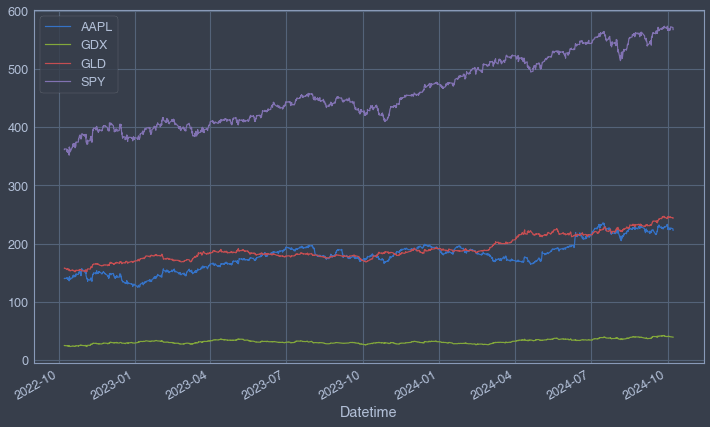

In [4]:
df = pd.read_csv('../../data/bt/gld_gdx_aapl_spy__1H.csv', parse_dates=True, header=[0, 1], index_col=0)
df['Close'].plot()

In [43]:
df.index = pd.to_datetime(df.index, utc=True)

In [45]:
symbol = 'GLD'
data = df['Close'][symbol].to_frame()
data.rename(columns={symbol: 'price'}, inplace=True)
data.head()

,price
Datetime,
2022-10-07 18:30:00+00:00,157.720001
2022-10-07 19:30:00+00:00,157.919998
2022-10-10 13:30:00+00:00,155.869995
2022-10-10 14:30:00+00:00,155.419998
2022-10-10 15:30:00+00:00,155.265106


In [46]:
lags = 5
cols = []
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    data[col] = data['price'].shift(lag) 
    cols.append(col)
data.dropna(inplace=True)

reg = np.linalg.lstsq(data[cols], data['price'], rcond=None)[0]
reg

array([ 1.00025472e+00,  1.18319417e-02, -7.21872806e-03, -1.79889147e-04,
       -4.55960808e-03])

In [47]:
data.head()

,price,lag_1,lag_2,lag_3,lag_4,lag_5
Datetime,,,,,,
2022-10-10 16:30:00+00:00,155.350006,155.265106,155.419998,155.869995,157.919998,157.720001
2022-10-10 17:30:00+00:00,155.470001,155.350006,155.265106,155.419998,155.869995,157.919998
2022-10-10 18:30:00+00:00,155.330002,155.470001,155.350006,155.265106,155.419998,155.869995
2022-10-10 19:30:00+00:00,155.449997,155.330002,155.470001,155.350006,155.265106,155.419998
2022-10-11 13:30:00+00:00,155.240005,155.449997,155.330002,155.470001,155.350006,155.265106


In [48]:
data.sample(10)

,price,lag_1,lag_2,lag_3,lag_4,lag_5
Datetime,,,,,,
2023-02-09 20:30:00+00:00,173.029999,172.975006,173.529999,173.649994,174.149994,174.190002
2022-12-08 19:30:00+00:00,166.410004,166.449997,166.544998,166.487106,166.365005,166.979996
2023-11-07 14:30:00+00:00,182.059998,183.369995,183.559998,183.539993,183.744995,183.979996
2022-11-16 18:30:00+00:00,165.139999,165.009995,165.289993,165.440002,165.214005,165.539993
2023-08-21 17:30:00+00:00,175.815002,175.800003,175.479996,175.350006,175.169998,175.320007
2024-08-20 18:30:00+00:00,232.269897,232.380295,232.240005,231.574997,231.929993,233.229996
2024-02-14 18:30:00+00:00,184.369995,184.470001,184.470001,184.425003,184.089905,184.550003
2022-11-10 18:30:00+00:00,163.000000,162.949997,162.869995,162.699997,162.994995,158.660004
2024-06-14 14:30:00+00:00,215.289993,215.769897,212.970001,213.000000,212.860001,212.880005


In [51]:
data['prediction'] = np.dot(data[cols], reg)

<AxesSubplot:xlabel='Datetime'>

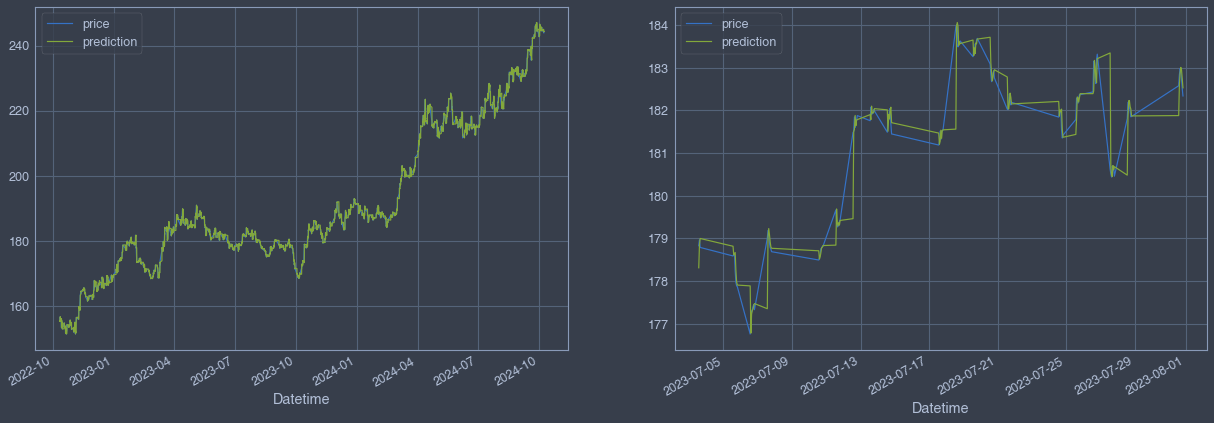

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(21, 7))
data[['price', 'prediction']].plot(ax=ax[0]);
data[['price', 'prediction']].loc['2023-07'].plot(ax=ax[1])